In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.2 MB/s 
     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 240 kB 46.2 MB/s 
     |████████████████████████████████| 106 kB 50.5 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 943 kB 58.8 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.5 MB/s 
     |████████████████████████████████| 4.1 MB 29.9 MB/s 
     |████████████████████████████████| 1.9 MB 43.5 MB/s 
     |████████████████████████████████| 112 kB 62.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.1-py3-none-any.whl size=12224 sha256=0f4e75dc3e3c5221ac286cea2f65dfdfe9e0402ba8658e1c9b8c4b043a340750
  Stored in directory: /root/.cache/pip/wheels/5a/65/57/e93e8

In [2]:
from qiskit import *

In [3]:
from qiskit.visualization import plot_histogram

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
qc = QuantumCircuit(6,5)
qc.x(5)
for i in range(5):
    qc.h(i)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ X ├
     └───┘
c_0: ═════
          
c_1: ═════
          
c_2: ═════
          
c_3: ═════
          
c_4: ═════

In [6]:
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qc.cp(math.pi/4, counting_qubit, 5); # This is CU
    repetitions *= 2
qc.draw()

┌───┐                                                               »
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────»
     ├───┤ │                                                             »
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────»
     ├───┤ │        │        │                                           »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────»
     ├───┤ │        │        │        │        │        │        │       »
q_3: ┤ H ├─┼────────┼────────┼────────┼────────┼────────┼────────┼───────»
     ├───┤ │        │        │        │        │        │        │       »
q_4: ┤ H ├─┼────────┼────────┼────────┼────────┼────────┼────────┼───────»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) »
q_5: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────»
     └───┘                                                               »
c_0: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_1: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_2: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_3: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_4: ════════════════════════════════════════════════════════════════════»
                                                                         »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_3: ─■────────■────────■────────■────────■────────■────────■────────■───────»
«      │        │        │        │        │        │        │        │       »
«q_4: ─┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼───────»
«      │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) »
«q_5: ─■────────■────────■────────■────────■────────■────────■────────■───────»
«                                                                             »
«c_0: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_1: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_2: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_3: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_4: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ──────────────────────────────────

In [7]:
def qft_inverse(qc, n): #inverse of Quantum Fourier Transform
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [8]:
qc.barrier()
#applying inverse of Quantum Fourier Transform
qft_inverse(qc, 5)
qc.barrier()
for n in range(5):
    qc.measure(n,n)

In [9]:
qc.draw()

┌───┐                                                               »
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────»
     ├───┤ │                                                             »
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────»
     ├───┤ │        │        │                                           »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────»
     ├───┤ │        │        │        │        │        │        │       »
q_3: ┤ H ├─┼────────┼────────┼────────┼────────┼────────┼────────┼───────»
     ├───┤ │        │        │        │        │        │        │       »
q_4: ┤ H ├─┼────────┼────────┼────────┼────────┼────────┼────────┼───────»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) »
q_5: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────»
     └───┘                                                               »
c_0: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_1: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_2: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_3: ════════════════════════════════════════════════════════════════════»
                                                                         »
c_4: ════════════════════════════════════════════════════════════════════»
                                                                         »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_3: ─■────────■────────■────────■────────■────────■────────■────────■───────»
«      │        │        │        │        │        │        │        │       »
«q_4: ─┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼───────»
«      │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) »
«q_5: ─■────────■────────■────────■────────■────────■────────■────────■───────»
«                                                                             »
«c_0: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_1: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_2: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_3: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_4: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ──────────────────────────────────

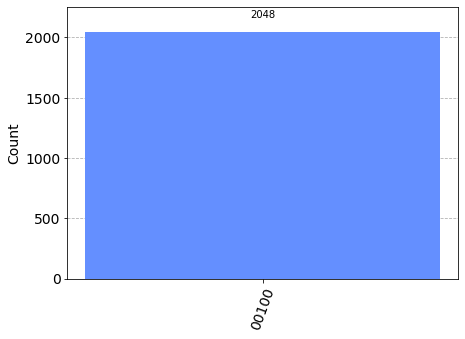

In [10]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [11]:
#we need to divide our result 00100 (4)) with 2^n where n is the number of counting qubits to get theta = 1/8.